# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
x_train = pd.read_csv(r'./dados_atividade/base_treino.csv').set_index(['index', 'individuo'])
y_train = pd.read_csv(r'./dados/train/y_train.txt')
x_test = pd.read_csv(r'./dados_atividade/base_teste.csv').set_index(['index', 'individuo'])
y_test = pd.read_csv(r'./dados/test/y_test.txt')

In [3]:
x_test.head(3)

,,"('tBodyAcc-mean()-X',)","('tBodyAcc-mean()-Y',)","('tBodyAcc-mean()-Z',)","('tBodyAcc-std()-X',)","('tBodyAcc-std()-Y',)","('tBodyAcc-std()-Z',)","('tBodyAcc-mad()-X',)","('tBodyAcc-mad()-Y',)","('tBodyAcc-mad()-Z',)","('tBodyAcc-max()-X',)",...,"('fBodyBodyGyroJerkMag-meanFreq()',)","('fBodyBodyGyroJerkMag-skewness()',)","('fBodyBodyGyroJerkMag-kurtosis()',)","('angle(tBodyAccMean,gravity)',)","('angle(tBodyAccJerkMean),gravityMean)',)","('angle(tBodyGyroMean,gravityMean)',)","('angle(tBodyGyroJerkMean,gravityMean)',)","('angle(X,gravityMean)',)","('angle(Y,gravityMean)',)","('angle(Z,gravityMean)',)"
index,individuo,,,,,,,,,,,,,,,,,,,,,
0,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
#Capturando 25% da base de treinos
x_validation = x_train.sample(frac=0.25, random_state=1)
#Removendo dados capturados da base original
x_train = x_train.drop(x_validation.index)

y_validation = y_train.sample(frac=0.25, random_state=1)
y_train = y_train.drop(y_validation.index)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [5]:
# Treinando modelo
clf = DecisionTreeClassifier(random_state=100, max_depth=4).fit(x_train, y_train)

In [6]:
# Capturando os níveis de importância de cada coluna
importances = clf.feature_importances_

In [7]:
# Capturando os nomes das colunas
cols = x_train.columns

In [8]:
# Criando um dataframe com os nomes das colunas de x_train e os valores de importancia
clf_importance = pd.DataFrame(importances, cols, columns = ['importancia_clf'])
# Capturando os 3 maiores valores de importancia
melhores = clf_importance.query('importancia_clf > 0').sort_values(by='importancia_clf', ascending = False)[0:3]
melhores

,importancia_clf
"('tGravityAcc-mean()-X',)",0.287045
"('tBodyAccJerk-energy()-X',)",0.253772
"('angle(Y,gravityMean)',)",0.164121


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [9]:
# Selecionando apenas as melhores colunas nos dataframes
x_train = x_train[melhores.index]
x_test = x_test[melhores.index]
x_validation = x_validation[melhores.index]

In [32]:
#Criando árvores com diferentes valores de poda
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(x_train, y_train)
#Capturando valores ccp_alpha e impurities
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [34]:
clfs = []
#Treinando árvores para cada valor de ccp_alpha obtido acima e acumulando em uma lista
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(x_train, y_train)
    clfs.append(clf)

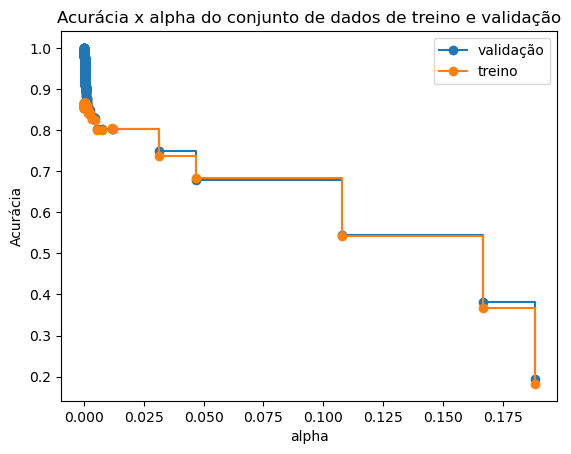

In [41]:
#Obtendo acurácia de cada uma das árvores com base nos dados de treino e de validação.
train_scores = [clf.score(x_train, y_train) for clf in clfs]
valid_scores = [clf.score(x_validation, y_validation) for clf in clfs]

#Plotando gráfico
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [42]:
#Obtendo a última maior acurácia da lista de valid_scores
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 86.62


DecisionTreeClassifier(ccp_alpha=0.00035234959017858527, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [43]:
#Obtendo acurácia da base de teste
acuracia_teste = melhor_arvore.score(x_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')

Acurácia: 68.77


> Houve uma queda significativa de acurácia ao executar o modelo com os dados de teste. A acurácia não se "sustentou".

In [10]:
# Exportando os nomes das melhores colunas para serem utilizados no próximo exercício
melhores.to_csv('melhores.csv', index = True)